In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('fake_job_postings.csv')

# data.head()
data[data['fraudulent'] == 1].head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
173,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,1
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1


In [96]:
data.info()
# most null values: salary range,requried edcutaion 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [97]:
data.drop(['job_id','salary_range','telecommuting','has_company_logo','has_questions'],axis=1,inplace=True)

In [98]:
data.info()
# data.dropna(subset=['description','requirements'],inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   company_profile      14572 non-null  object
 4   description          17879 non-null  object
 5   requirements         15184 non-null  object
 6   benefits             10668 non-null  object
 7   employment_type      14409 non-null  object
 8   required_experience  10830 non-null  object
 9   required_education   9775 non-null   object
 10  industry             12977 non-null  object
 11  function             11425 non-null  object
 12  fraudulent           17880 non-null  int64 
dtypes: int64(1), object(12)
memory usage: 1.8+ MB


In [ ]:





# frequent top 10   fake jobs titles 
fake_job = data[data['fraudulent'] ==  1]
fake_job_title = fake_job['title'].value_counts().nlargest(100).index
# print(fake_job['title'])
# sns.catplot(data = fake_job[fake_job['title'].isin(fake_job_title)] , kind = 'count' , y = 'title' ,order = fake_job_title)
# plt.title("Top 25 Most Frequent Fake Job Titles")  # Add your title here
print(fake_job_title)

Index(['Data Entry Admin/Clerical Positions - Work From Home',
       'Cruise Staff Wanted *URGENT*',
       'Home Based Payroll Typist/Data Entry Clerks Positions Available',
       'Customer Service Representative', 'Administrative Assistant',
       'Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily ',
       'Account Sales Managers $80-$130,000/yr',
       'Payroll Data Coordinator Positions - Earn $100-$200 Daily ',
       'Network Marketing', 'Payroll Clerk',
       'Agency Sales Managers $150-$175,000/yr', 'Data Entry',
       'Lawn and Maintenance Contractors ', 'Call Center Representative',
       ' Payroll Data Entry Clerk Position - Earn $100-$200 Daily ',
       'Executive Chef', 'Property Preservation Field Crews',
       'Customer Assistant', 'Optical Sales', 'Customer Service Rep',
       'Call Center Representative I', 'Admin Assistant', 'Accountant',
       'FRONT OFFICE MANAGER', 'Data Entry Clerk',
       'Assistant Accountant/immediate start',
    

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt

# 1. Load your CSV file
df = pd.read_csv("fake_job_postings.csv")

# 2. Fill all null values with "Not Mentioned"
df.fillna("Not Mentioned", inplace=True)

# 3. Work on unique job titles for clustering
unique_titles = df[['title']].drop_duplicates().reset_index(drop=True)

# 4. Load sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# 5. Create embeddings
title_embeddings = model.encode(unique_titles['title'].tolist(), show_progress_bar=True)

# 6. Apply KMeans clustering
n_clusters = 10  # You can change this
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
unique_titles['cluster'] = kmeans.fit_predict(title_embeddings)
def get_cluster_name(cluster_id):
    cluster_names = {
        0: "Customer Support",
        1: "Admin/Data Entry",
        2: "Engineering",
        3: "Sales",
        4: "Software/IT",
        5: "Healthcare",
        6: "Marketing",
        7: "Management",
        8: "Clerical",
        9: "Others"
    }
    return cluster_names.get(cluster_id, "Unknown")



# print(unique_titles.to_string())
df['cluster_name'] = unique_titles['cluster'].apply(get_cluster_name)
df.head()
# # 8. Merge cluster info back into original DataFrame
# df['cluster_name'] = df['title'].apply()

# # 9. Save the new DataFrame (optional)
# df.to_csv("clustered_jobs.csv", index=False)

# # 10. Analysis example: see % fake jobs per cluster
# cluster_fraud_rate = df.groupby('cluster_name')['fraudulent'].mean().sort_values(ascending=False)
# print(cluster_fraud_rate)

# # Optional: Plot the result
# cluster_fraud_rate.plot(kind='bar', title='Fraud Rate by Job Cluster')
# plt.ylabel("Fraud Rate")
# plt.xlabel("Job Cluster")
# plt.show()


Batches: 100%|██████████| 351/351 [00:03<00:00, 96.87it/s] 


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,cluster_name
0,1,Marketing Intern,"US, NY, New York",Marketing,Not Mentioned,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Mentioned,0,1,0,Other,Internship,Not Mentioned,Not Mentioned,Marketing,0,Engineering
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Mentioned,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Not Mentioned,Marketing and Advertising,Customer Service,0,Marketing
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Not Mentioned,Not Mentioned,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Mentioned,0,1,0,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,0,Customer Support
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Mentioned,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Admin/Data Entry
4,5,Bill Review Manager,"US, FL, Fort Worth",Not Mentioned,Not Mentioned,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,Admin/Data Entry


In [5]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,cluster_name
0,1,Marketing Intern,"US, NY, New York",Marketing,Not Mentioned,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Mentioned,0,1,0,Other,Internship,Not Mentioned,Not Mentioned,Marketing,0,Engineering
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Not Mentioned,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Not Mentioned,Marketing and Advertising,Customer Service,0,Marketing
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Not Mentioned,Not Mentioned,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Mentioned,0,1,0,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,0,Customer Support
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Not Mentioned,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Admin/Data Entry
4,5,Bill Review Manager,"US, FL, Fort Worth",Not Mentioned,Not Mentioned,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,Admin/Data Entry


Text(0.5, 1.0, 'Top 25 Most Frequent Real  Job Titles')

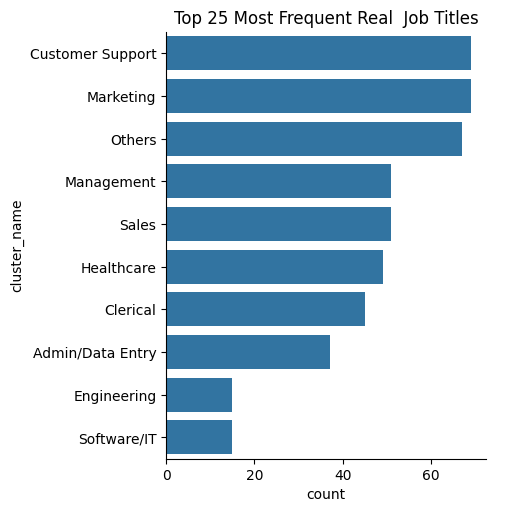

In [ ]:
# frequent top 10   fake jobs titles 
fake_job = df[df['fraudulent'] ==  1]
fake_job_title = fake_job['cluster_name'].value_counts().nlargest(25).index
# print(fake_job['title'])
sns.catplot(data = fake_job[fake_job['cluster_name'].isin(fake_job_title)] , kind = 'count' , y = 'cluster_name' ,order = fake_job_title)
plt.title("Top 25 Most Frequent Fake  Job Titles")  # Add your title here


Text(0.5, 1.0, 'Top 25 Most Frequent   Real job Titles')

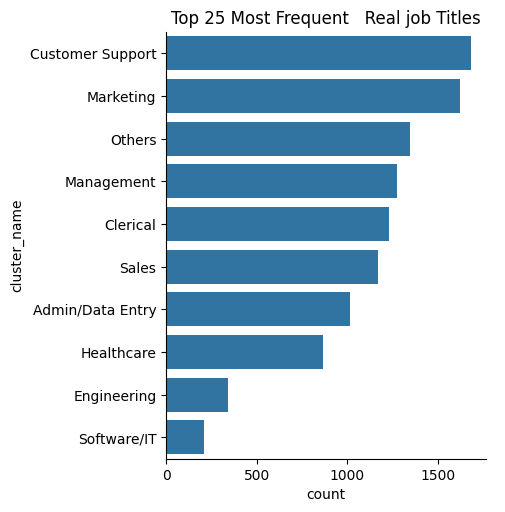

In [17]:
# frequent top 10   fake jobs titles 
fake_job = df[df['fraudulent'] ==  0]
fake_job_title = fake_job['cluster_name'].value_counts().nlargest(25).index
# print(fake_job['title'])
sns.catplot(data = fake_job[fake_job['cluster_name'].isin(fake_job_title)] , kind = 'count' , y = 'cluster_name' ,order = fake_job_title)
plt.title("Top 25 Most Frequent   Real job Titles")  # Add your title here


In [ ]:
results = []
for keyword in ["data ", "admin", "administrative", "clerical", 
                "office assistant", "receptionist", "secretary"]:
    results.append(keyword in title.lower()  )
print(results)

[True, False, False, False, False, False, False]


In [15]:
title = 'Data anayklt'

any(keyword in title.lower() for keyword in ["data ", "admin", "administrative", "clerical", 
                "office assistant", "receptionist", "secretary"])


True

Text(0.5, 1.0, 'Top 25 Most Frequent Real  Job Titles')

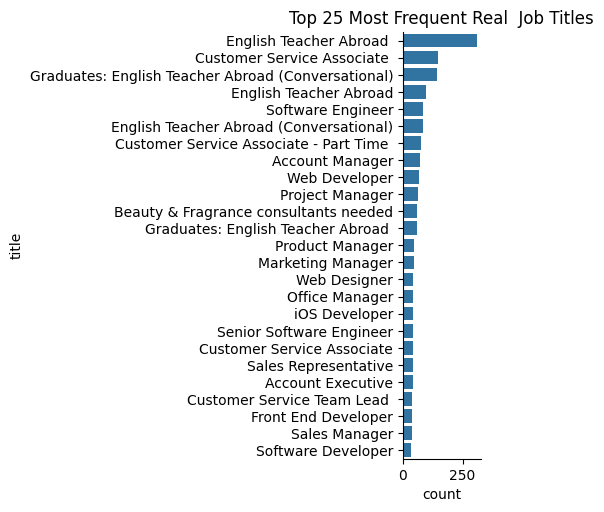

In [123]:
# frequent top 10   fake jobs titles 
fake_job = data[data['fraudulent'] ==  0]
fake_job_title = fake_job['title'].value_counts().nlargest(25).index
# print(fake_job['title'])
sns.catplot(data = fake_job[fake_job['title'].isin(fake_job_title)] , kind = 'count' , y = 'title' ,order = fake_job_title)
plt.title("Top 25 Most Frequent Real  Job Titles")  # Add your title here


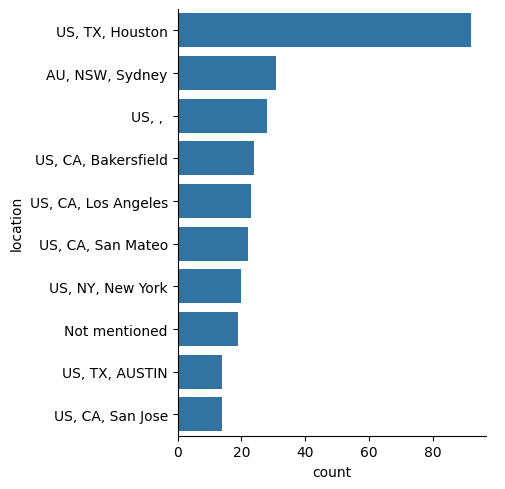

In [111]:
# nan or empty string replaced by not mentioned location 
data['location'] = data['location'].fillna('').replace('','Not mentioned')
fake_job = data[data['fraudulent'] ==  1]
fake_job_location_top = fake_job['location'].value_counts().nlargest(10).index

sns.catplot(data = fake_job[fake_job['location'].isin(fake_job_location_top)], y = 'location',kind = 'count', order = fake_job_location_top)
# fake_job.head()
# fake_job_for_location= fake_job.dropna(subset=['location'])
# fake_job.info()
# # print(fake_job['title'])
# sns.catplot(data = fake_job[fake_job['location'].isin(fake_job_location_top)] , kind = 'count' , y = 'location' ,order = fake_job_location)

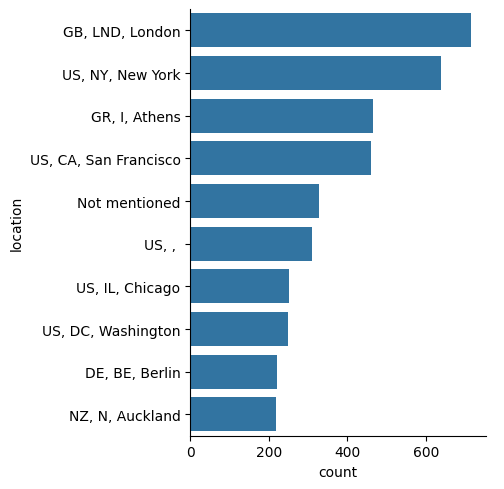

In [112]:
# nan or empty string replaced by not mentioned location 
data['location'] = data['location'].fillna('').replace('','Not mentioned')
fake_job = data[data['fraudulent'] ==  0]
fake_job_location_top = fake_job['location'].value_counts().nlargest(10).index

sns.catplot(data = fake_job[fake_job['location'].isin(fake_job_location_top)], y = 'location',kind = 'count', order = fake_job_location_top)
# fake_job.head()
# fake_job_for_location= fake_job.dropna(subset=['location'])
# fake_job.info()
# # print(fake_job['title'])
# sns.catplot(data = fake_job[fake_job['location'].isin(fake_job_location_top)] , kind = 'count' , y = 'location' ,order = fake_job_location)

In [117]:
data['location'].eq('Not mentioned').groupby(data['fraudulent']).mean()*100

# not empty location does not helping in finding the fake jobs or real jobs 

fraudulent
0    1.921947
1    2.193995
Name: location, dtype: float64

- job id 
- title
- location 
- department : marketing , sales
- saralry_range
- compnay_profile 
- descritipion : is it job descrition ? or company description ?
- requiremtn : what they are looking for in a candidate ?
- benfit 
- telcommnicaton : ??? bolean
- has_company_logo: bolean
- has_questions : ?? bolean
- employment_type
- required_experience: min sernior level , inten 
- required_education
- industry
- function : what is the job function ?
-fraudulent